# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неоконченное высшее', 'Среднее', 'Неполное среднее', 'Два и более высших образования', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Подбор персонала', 'Сборочные производства', 'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Строительство', 'Ресторанный бизнес/Общественное питание', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Сельское хозяйство', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Маркетинг', 'Логистика', 'Страхование', 'Торговля', 'Наука', 'Управляющая компания', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Информационные технологии', 'Туризм', 'Образование', 'Информационные услуги', 'Государственная служба', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..


In [63]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [35]:
df.count(axis=0)

AGREEMENT_RK                  30133
TARGET                        30133
AGE                           30133
SOCSTATUS_WORK_FL             30133
SOCSTATUS_PENS_FL             30133
GENDER                        30133
CHILD_TOTAL                   30133
DEPENDANTS                    30133
EDUCATION                     30133
MARITAL_STATUS                30133
GEN_INDUSTRY                  27420
GEN_TITLE                     27420
ORG_TP_STATE                  27420
ORG_TP_FCAPITAL               27425
JOB_DIR                       27420
FAMILY_INCOME                 30133
PERSONAL_INCOME               30133
REG_ADDRESS_PROVINCE          30133
FACT_ADDRESS_PROVINCE         30133
POSTAL_ADDRESS_PROVINCE       30133
TP_PROVINCE                   29543
REGION_NM                     30131
REG_FACT_FL                   30133
FACT_POST_FL                  30133
REG_POST_FL                   30133
REG_FACT_POST_FL              30133
REG_FACT_POST_TP_FL           30133
FL_PRESENCE_FL              

In [36]:
df.info()
# есть пропуски в колонках: 
#    GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, 
#    TP_PROVINCE, REGION_NM, WORK_TIME, PREVIOUS_CARD_NUM_UTILIZED
# 
# 1. значения колонок GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, 
# TP_PROVINCE, REGION_NM можно заполнить наиболее часто встречающимися значениями
#
# 2. пустые значения колонки WORK_TIME (тип float64) можно заполнить средними значениями колонки
#
# 3. в колонке PREVIOUS_CARD_NUM_UTILIZED только 4% заполненных значений, 
#    данными этой колонки можно пренебречь и колонку удалить из набора данных
# 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Задание 2. Есть ли категориальные признаки? Что с ними делать?


In [65]:
categorical_cols = [c for c in df.columns if df[c].dtype.name == 'object']
print('Категориальные признаки:')
print(categorical_cols)
#
# категориальные признаки необходимо перекодировать числовыми значениями
#

Категориальные признаки:
['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'sample']


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [131]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # 1.
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1) # axis=1 - удаляем колонку AGREEMENT_RK
    
    # 2.
    #PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
  
    # 3.
    # категориальные признаки
    samlpe_col = ['sample'] # пока исключим колонку признака train/test
    categorical_cols = [c for c in df_output.columns if (df_output[c].dtype.name == 'object' and c not in samlpe_col ) ]
    print('определены категориальные признаки:')
    print(categorical_cols)

    # 3.1. заполним пропуски в колонках с категориальными признаками "топовыми" значениями
    data_describe = df_output.describe(include=[object])
    for c in categorical_cols:
        df_output[c] = df_output[c].fillna(data_describe[c]['top'])
    
    # 3.2. пустые значения колонки WORK_TIME (тип float64) можно заполнить средними значениями колонки
    #df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna( df_output['WORK_TIME'].median() )
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].median()
    
    # 3.3. в колонке PREVIOUS_CARD_NUM_UTILIZED только 4% заполненных значений, 
    #    данными этой колонки можно пренебречь и колонку удалить из набора данных
    df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1) # axis=1 - удаляем колонку PREVIOUS_CARD_NUM_UTILIZED
     
    # 4. кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=categorical_cols)
    
    return df_output

In [132]:
#df_preproc = preproc_data(df)
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


определены категориальные признаки:
['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [133]:
Y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis = 1)

Y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis = 1)


#### Задание 5. Обучение и оценка качества разных моделей

In [140]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [152]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model_LR = LogisticRegression() 
model_LR.fit(Xtrain, ytrain)  
predict_LR = model_LR.predict(Xtest) 
predict_proba_LR = model_LR.predict_proba(Xtest)

model_RFC = RandomForestClassifier(n_estimators=30) 
model_RFC.fit(Xtrain, ytrain)  
predict_RFC = model_RFC.predict(Xtest) 
predict_proba_RFC = model_RFC.predict_proba(Xtest)

model_DTC = DecisionTreeClassifier() 
model_DTC.fit(Xtrain, ytrain)  
predict_DTC = model_DTC.predict(Xtest) 
predict_proba_DTC = model_DTC.predict_proba(Xtest)


In [204]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

results = pd.DataFrame({'model name': ['Logistic regression', 'Random forest classifier', 'Decision tree classifier'],
                        'precision': [precision_score(ytest, predict_LR), 
                                      precision_score(ytest, predict_RFC),
                                      precision_score(ytest, predict_DTC) ],
                        'recall': [recall_score(ytest, predict_LR), 
                                   recall_score(ytest, predict_RFC), 
                                   recall_score(ytest, predict_DTC) ] ,
                        'accuracy': [accuracy_score(ytest, predict_LR), 
                                     accuracy_score(ytest, predict_RFC), 
                                     accuracy_score(ytest, predict_DTC)] 
                       }, index=['LR','RFC','DTC'])

results


,model name,precision,recall,accuracy
LR,Logistic regression,0.333333,0.003604,0.878038
RFC,Random forest classifier,0.666667,0.003604,0.878695
DTC,Decision tree classifier,0.160535,0.172973,0.789577


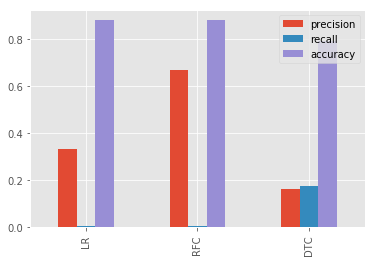

In [227]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

results.plot(kind='bar', legend=True)


,model name,roc_auc
LR,Logistic regression,0.637465
RFC,Random forest classifier,0.620124
DTC,Decision tree classifier,0.523924


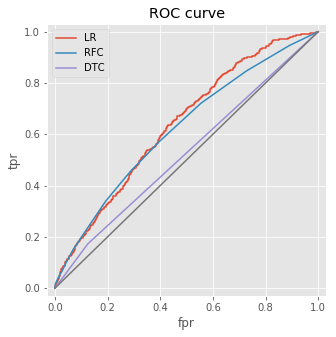

In [205]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

fpr_LR, tpr_LR, thresholds = roc_curve(ytest, predict_proba_LR[:,1])
fpr_RFC, tpr_RFC, thresholds = roc_curve(ytest, predict_proba_RFC[:,1])
fpr_DTC, tpr_DTC, thresholds = roc_curve(ytest, predict_proba_DTC[:,1])


plt.figure(figsize=(5, 5), )

plt.plot(fpr_LR, tpr_LR, label='LR')
plt.plot(fpr_RFC, tpr_RFC, label='RFC')
plt.plot(fpr_DTC, tpr_DTC, label='DTC')
plt.legend()

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.03, 1.03))
plt.ylim((-0.03, 1.03))


roc_auc = pd.DataFrame({'model name': ['Logistic regression', 'Random forest classifier', 'Decision tree classifier'],
                        'roc_auc': [roc_auc_score(ytest, predict_proba_LR[:,1]), 
                                    roc_auc_score(ytest, predict_proba_RFC[:,1]),
                                    roc_auc_score(ytest, predict_proba_DTC[:,1]) ]
                       }, index=['LR','RFC','DTC'])

roc_auc


In [219]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cvs_lr = cross_val_score(model_LR, Xtrain, ytrain, scoring='roc_auc', cv=10)
cvs_rfc = cross_val_score(model_RFC, Xtrain, ytrain, scoring='roc_auc', cv=10)
cvs_dtc = cross_val_score(model_DTC, Xtrain, ytrain, scoring='roc_auc', cv=10)


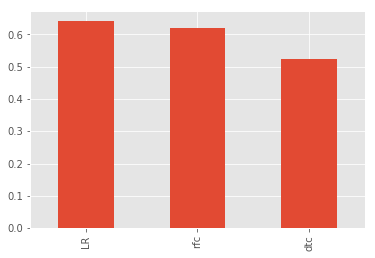

In [221]:
cvs_result = {'LR':cvs_lr.mean(), 'rfc':cvs_rfc.mean(), 'dtc':cvs_dtc.mean()}
pd.DataFrame.from_dict(data = cvs_result, orient='index').plot(kind='bar', legend=False)

In [228]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

test_predict_LR = model_LR.predict(X_test) 
test_predict_proba_LR = model_LR.predict_proba(X_test)


0.6202356491532783

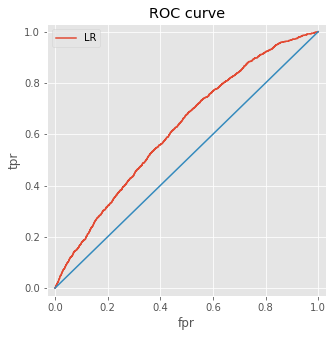

In [229]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

test_fpr_LR, test_tpr_LR, thresholds = roc_curve(Y_test, test_predict_proba_LR[:,1])

plt.figure(figsize=(5, 5), )

plt.plot(test_fpr_LR, test_tpr_LR, label='LR')
plt.legend()

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.03, 1.03))
plt.ylim((-0.03, 1.03))

roc_auc_score(Y_test, test_predict_proba_LR[:,1])


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомментирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)